In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
# считуємо дані з файлу та перетворюємо тип риби в число
dataset = shuffle(pd.read_csv("fish.csv"))
le = LabelEncoder()
dataset["Species"] = le.fit_transform(dataset["Species"])

In [76]:

# переглядаємо фічі
print(dataset.columns)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [77]:
# переглядаємо розмір датасету
print(dataset.shape)

(159, 7)


<AxesSubplot:>

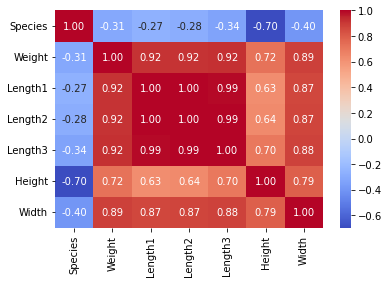

In [78]:
# переглядаємо heatmap попарних кореляцій стовпців
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=True, fmt=".2f")

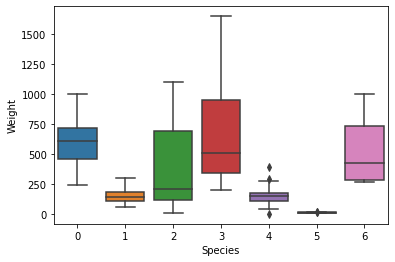

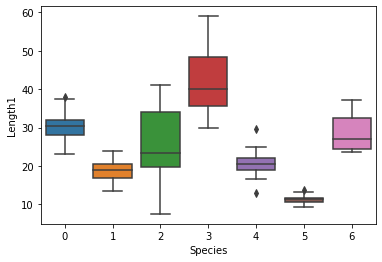

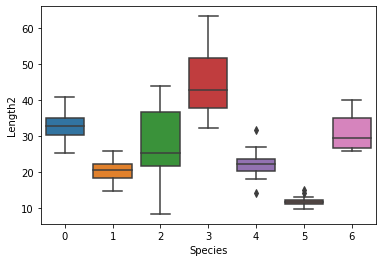

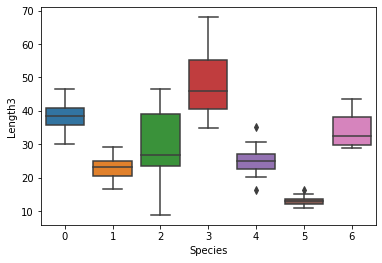

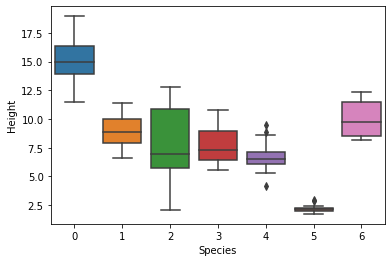

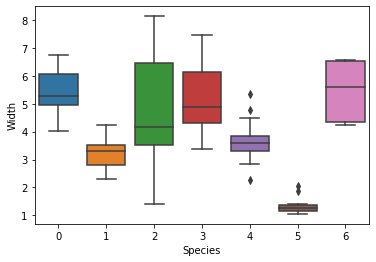

In [79]:
# переглядаємо діаграми розмаху для кожної фічі
for column in dataset.columns[1:]:
    figure = plt.figure()
    ax = sns.boxplot(x="Species", y=column, data=dataset)

In [80]:
# розбиваємо дані на тренувальні та тестові
X = dataset.drop("Species", axis=1)
Y = dataset["Species"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [81]:
# нормуємо дані
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# проводимо навчання методом KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski') #0.7916
#knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski') #0.66
#knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski') #0.6458
#knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan') #0.7708
#knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan') #0.6042
#knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan') #0.75
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.7916666666666666


In [83]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5
           2       0.76      0.95      0.84        20
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         2

    accuracy                           0.79        48
   macro avg       0.62      0.60      0.61        48
weighted avg       0.73      0.79      0.75        48



c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

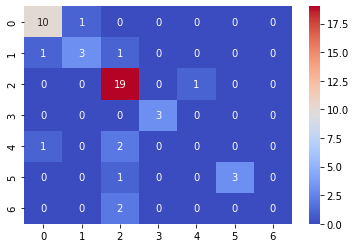

In [84]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [118]:
# проводимо навчання методом Decision Tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7) #0.6875
#dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5) #0.6875
#dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) #0.6042
#dtc = DecisionTreeClassifier(criterion='gini', max_depth=7) #0.66
#dtc = DecisionTreeClassifier(criterion='gini', max_depth=5) #0.6458
#dtc = DecisionTreeClassifier(criterion='gini', max_depth=3) #0.5416
dtc = dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.6875


In [86]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.80      0.80      0.80         5
           2       0.73      0.40      0.52        20
           3       0.60      1.00      0.75         3
           4       0.11      0.33      0.17         3
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         2

    accuracy                           0.62        48
   macro avg       0.54      0.63      0.57        48
weighted avg       0.67      0.62      0.62        48



c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

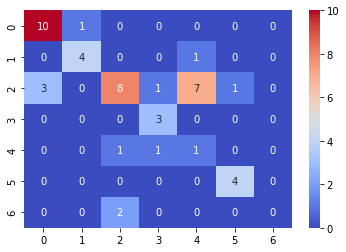

In [87]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [88]:
# підбираємо оптимальні gamma та C
param_grid = { 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid'] }
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, Y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

In [98]:
# проводимо навчання методом SVM
svc = SVC(C=10, gamma=1, kernel='poly') #0.875
svc = svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.875


In [90]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.83      1.00      0.91         5
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00         3
           4       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         2

    accuracy                           0.88        48
   macro avg       0.75      0.74      0.74        48
weighted avg       0.87      0.88      0.87        48



<AxesSubplot:>

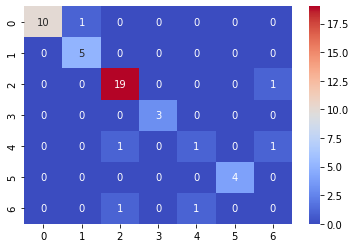

In [91]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [92]:
# проводимо навчання методом Random Forest
rfc = RandomForestClassifier(criterion='entropy', max_depth=7) #0.8125
#rfc = RandomForestClassifier(criterion='entropy', max_depth=5) #0.7292
#rfc = RandomForestClassifier(criterion='entropy', max_depth=3) #0.66
#rfc = RandomForestClassifier(criterion='gini', max_depth=7) #0.7292
#rfc = RandomForestClassifier(criterion='gini', max_depth=5) #0.7083
#rfc = RandomForestClassifier(criterion='gini', max_depth=3) #0.6458
rfc = rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.8125


In [93]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.80      0.80      0.80         5
           2       0.85      0.85      0.85        20
           3       0.60      1.00      0.75         3
           4       0.33      0.33      0.33         3
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         2

    accuracy                           0.81        48
   macro avg       0.63      0.70      0.65        48
weighted avg       0.79      0.81      0.80        48



c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

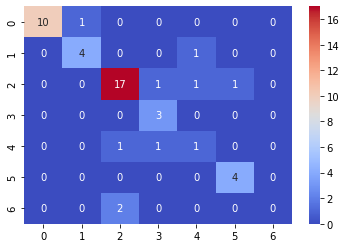

In [94]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [95]:
# проводимо навчання методом AdaBoost
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0) #0.5
#abc = AdaBoostClassifier(n_estimators=50, learning_rate=10.0) #0.4166
#abc = AdaBoostClassifier(n_estimators=50, learning_rate=100.0) #0.33
#abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0) #0.5416
#abc = AdaBoostClassifier(n_estimators=100, learning_rate=10.0) #0.4166
#abc = AdaBoostClassifier(n_estimators=100, learning_rate=100.0) #0.33
abc = abc.fit(X_train, Y_train)
Y_pred = abc.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.5


In [96]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         5
           2       0.45      1.00      0.62        20
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         2

    accuracy                           0.50        48
   macro avg       0.21      0.29      0.23        48
weighted avg       0.27      0.50      0.34        48



c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

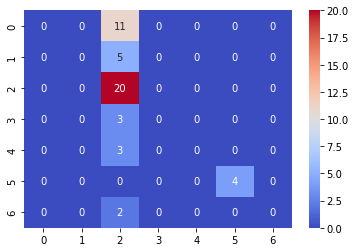

In [97]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")